# Model Selection and Hyperparameter Tuning

In [138]:
import pandas as pd
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from matplotlib import pyplot as plt

In [139]:
training_data_wt = pd.read_csv('Nata_Files/less_features/train_data_lf.csv', index_col=0)
testing_data_wt = pd.read_csv('Nata_Files/less_features/test_data_lf.csv', index_col=0)
prediction_data = pd.read_csv('Nata_Files/less_features/pred_data_lf.csv', index_col=0)
testing_data_wt.isna().sum()

baking_duration    0
egg_yolk_cnt       0
final_temp         0
salt_ratio         0
sugar_content      0
vanilla_extract    0
origin_dummy       0
target             0
dtype: int64

In [140]:
X_train = training_data_wt.drop('target', axis=1)
y_train = training_data_wt['target']
X_test = testing_data_wt.drop('target', axis=1)
y_test = testing_data_wt['target']

In [141]:
logreg = LogisticRegression(solver='sag', multi_class='ovr')

In [142]:
dtc = DecisionTreeClassifier(max_leaf_nodes=8, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
bag=BaggingClassifier(max_samples=0.2,estimator=knn, random_state=42, bootstrap=False)
bag.fit(X_train, y_train)
bag.score(X_test, y_test)

0.7361538461538462

In [143]:
bag.score(X_test, y_test)

0.7361538461538462

In [144]:
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)

In [145]:
X = X_train
y = y_train.map({'OK':1,'KO':0})

In [146]:
def return_f1score(model, X, y):
    n_scores = cross_val_score(model, X, y, scoring = 'f1', cv = rskf)
    return n_scores

In [147]:
def return_results(models, X = X, y = y):
    results, names = [],[]
    for name, model in models.items():
        scores = return_f1score(model, X, y)
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))

    plt.figure(figsize=(15,7))
    plt.boxplot(results, labels= names, showmeans = True)
    plt.xticks(fontsize=14)
    plt.show()

In [148]:
lreg = logreg.fit(X_train, y_train)
lreg.predict(X_train)
print(lreg.score(X_train, y_train))
print(lreg.score(X_test, y_test))

0.7501285347043701
0.7438461538461538


>DecisionTreeClassifier 0.788 (0.016)
>LogisticRegression 0.809 (0.015)
>KNN 0.792 (0.015)


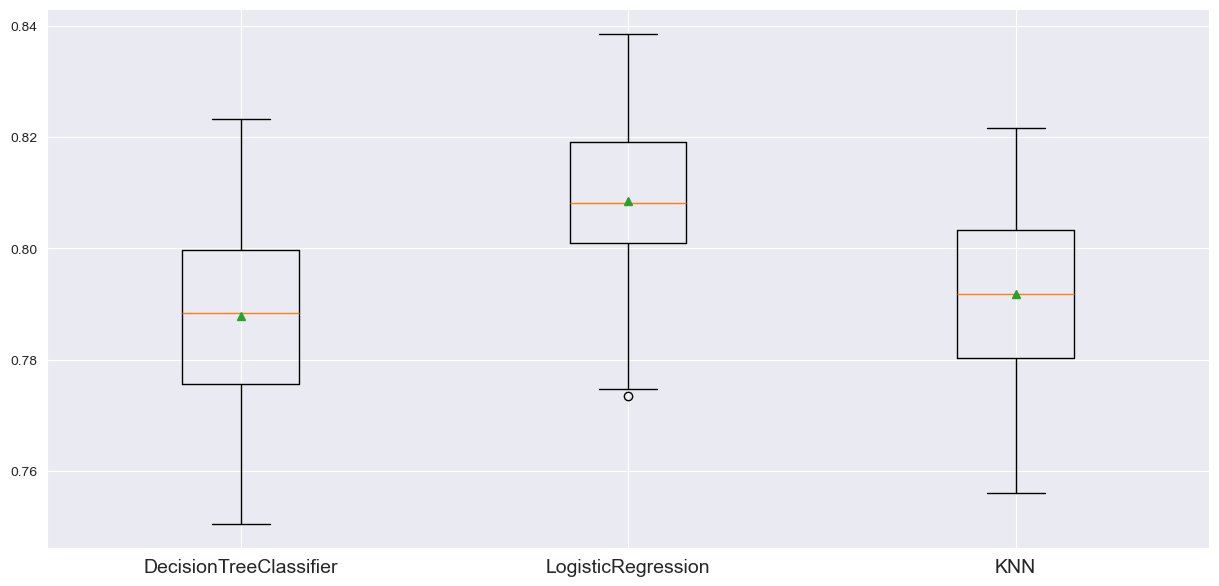

In [149]:
return_results({'DecisionTreeClassifier':dtc,'LogisticRegression':logreg,'KNN':knn}, X, y) #